In [51]:
import sys
sys.path.append('../raft/core')
sys.path.append('../raft/utils')

import argparse
import os
import matplotlib.pyplot as plt
import numpy as np

import datasets
from visu.flow_visu import flow_to_color

In [5]:
dataset_root = r'/home/mnegru/repos/optical-flow-dnn/raft/datasets/VirtualKITTI'
dataset = datasets.VirtualKITTI(root=dataset_root)
print(f"Loaded dataset, size = {len(dataset)}")

Loaded dataset, size = 21160


In [60]:
img_1, _, gt_flow, valid_flow_mask, semseg_1, _ = dataset[0]
img_1 = img_1.cpu().numpy()
img_1 = img_1.transpose(1, 2, 0).astype(np.uint8)
gt_flow = gt_flow.cpu().numpy()
valid_flow_mask = valid_flow_mask.cpu().numpy()
semseg_1 = semseg_1.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)

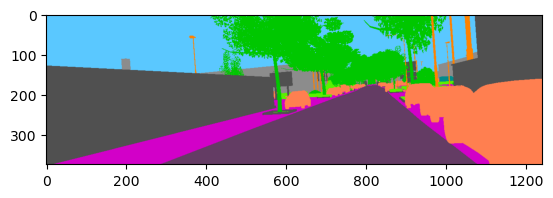

In [31]:
plt.imshow(semseg_1)

In [39]:
def gradient_x(img):
    gx = img[:, :-1] - img[:, 1:]
    return gx

def gradient_y(img):
    gy = img[:-1, :] - img[1:, :]
    return gy

In [32]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [33]:
semseg_gray = rgb2gray(semseg_1)

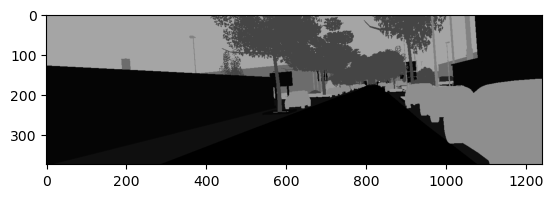

In [36]:
plt.imshow(semseg_gray, cmap=plt.get_cmap('gray'))

In [40]:
semseg_grad_x, semseg_grad_y = gradient_x(semseg_gray), gradient_y(semseg_gray)

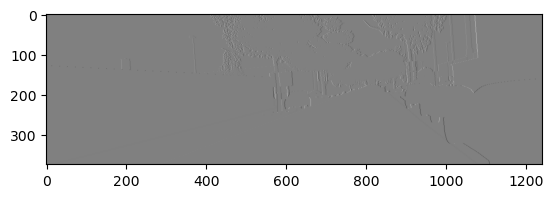

In [42]:
plt.imshow(semseg_grad_x, cmap=plt.get_cmap('gray'))

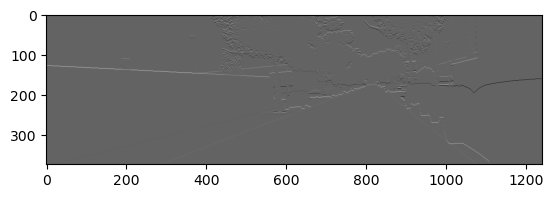

In [43]:
plt.imshow(semseg_grad_y, cmap=plt.get_cmap('gray'))

In [44]:
semseg_grad_x = np.sign(np.abs(semseg_grad_x))
semseg_grad_y = np.sign(np.abs(semseg_grad_y))

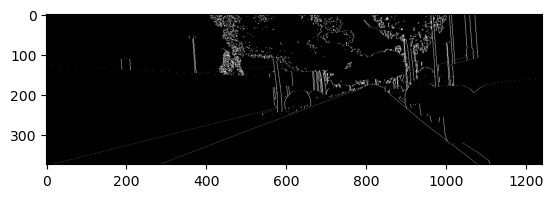

In [45]:
plt.imshow(semseg_grad_x, cmap=plt.get_cmap('gray'))

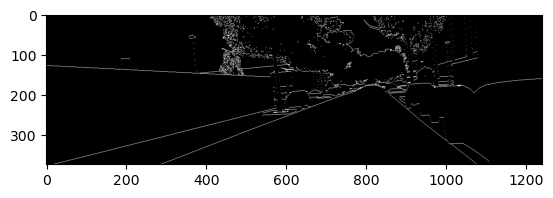

In [46]:
plt.imshow(semseg_grad_y, cmap=plt.get_cmap('gray'))

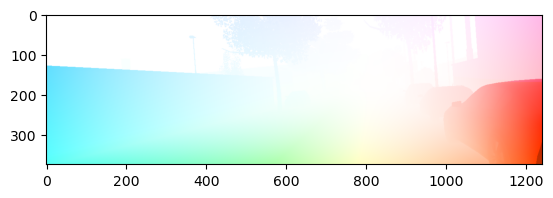

In [61]:
gt_flow = gt_flow * valid_flow_mask
plt.imshow(flow_to_color(gt_flow, channels_last=False))

In [65]:
u_flow, v_flow = gt_flow[0, :, :], gt_flow[1, :, :]

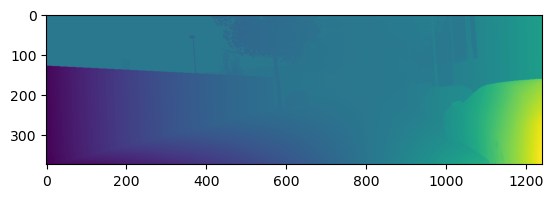

In [64]:
plt.imshow(u_flow)

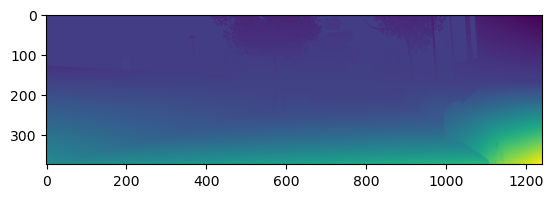

In [66]:
plt.imshow(v_flow)

In [67]:
u_flow_grad_x, u_flow_grad_y = gradient_x(u_flow), gradient_y(u_flow)
v_flow_grad_x, v_flow_grad_y = gradient_x(v_flow), gradient_y(v_flow)

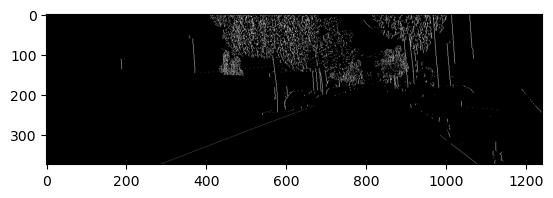

In [85]:
plt.imshow(u_flow_grad_x > 0, cmap=plt.get_cmap('gray'))

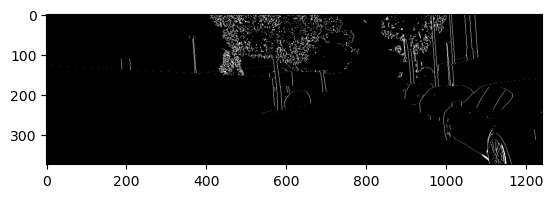

In [89]:
plt.imshow(np.abs(u_flow_grad_x) > 1, cmap=plt.get_cmap('gray'))

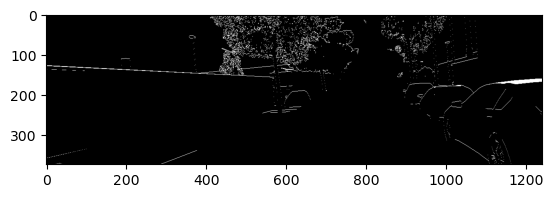

In [92]:
plt.imshow(np.abs(u_flow_grad_y) > 1, cmap=plt.get_cmap('gray'))

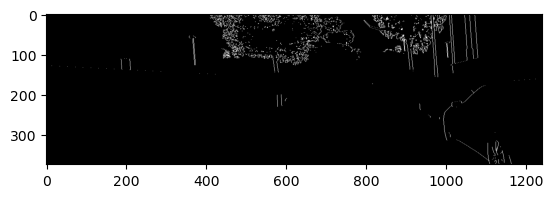

In [93]:
plt.imshow(np.abs(v_flow_grad_x) > 1, cmap=plt.get_cmap('gray'))

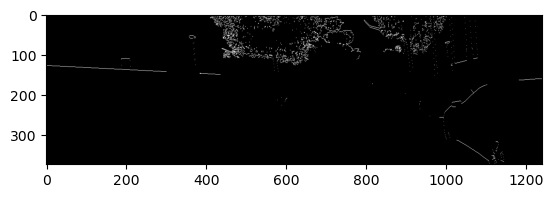

In [94]:
plt.imshow(np.abs(v_flow_grad_y) > 1, cmap=plt.get_cmap('gray'))

In [104]:
u_flow_grad_magnitude = np.sqrt(u_flow_grad_x[1:, :] ** 2 + u_flow_grad_y[:, 1:] ** 2)

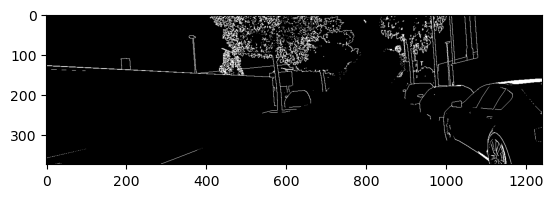

In [116]:
plt.imshow(u_flow_grad_magnitude > 1, cmap=plt.get_cmap('gray'))

In [117]:
v_flow_grad_magnitude = np.sqrt(v_flow_grad_x[1:, :] ** 2 + v_flow_grad_y[:, 1:] ** 2)

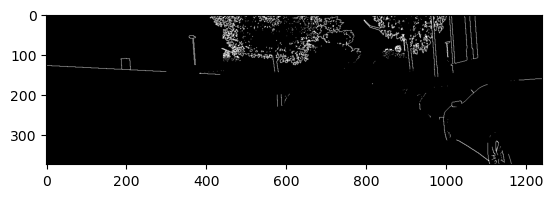

In [118]:
plt.imshow(v_flow_grad_magnitude > 1, cmap=plt.get_cmap('gray'))

In [119]:
flow_grad_magnitude = (u_flow_grad_magnitude + v_flow_grad_magnitude) / 2

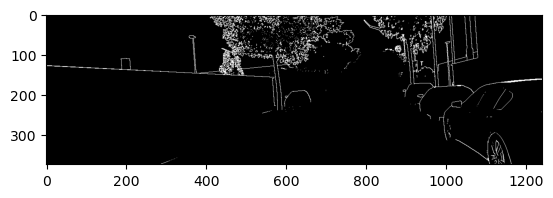

In [123]:
plt.imshow(flow_grad_magnitude > 1, cmap=plt.get_cmap('gray'))

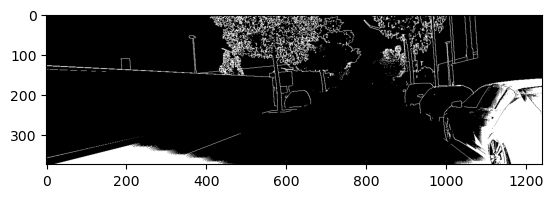

In [128]:
plt.imshow(flow_grad_magnitude > 0.5, cmap=plt.get_cmap('gray'))

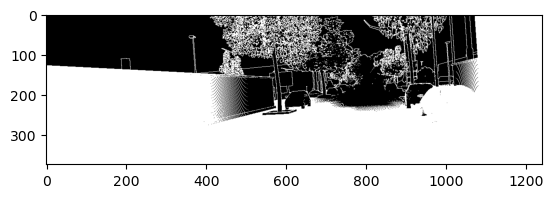

In [129]:
plt.imshow(flow_grad_magnitude > 0.1, cmap=plt.get_cmap('gray'))